$\newcommand{\xv}{\mathbf{x}}
\newcommand{\Xv}{\mathbf{X}}
\newcommand{\Xvh}{\hat{\mathbf{X}}}
\newcommand{\yv}{\mathbf{y}}
\newcommand{\Yv}{\mathbf{Y}}
\newcommand{\av}{\mathbf{a}}
\newcommand{\Wv}{\mathbf{W}}
\newcommand{\wv}{\mathbf{w}}
\newcommand{\gv}{\mathbf{g}}
\newcommand{\Hv}{\mathbf{H}}
\newcommand{\dv}{\mathbf{d}}
\newcommand{\Vv}{\mathbf{V}}
\newcommand{\vv}{\mathbf{v}}
\newcommand{\Uv}{\mathbf{U}}
\newcommand{\tv}{\mathbf{t}}
\newcommand{\Tv}{\mathbf{T}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\Zv}{\mathbf{Z}}
\newcommand{\Zvh}{\hat{\mathbf{Z}}}
\newcommand{\Ev}{\mathbf{E}}
\newcommand{\onev}{\mathbf{1}}
\newcommand{\muv}{\boldsymbol{\mu}}
\newcommand{\sigmav}{\boldsymbol{\sigma}}
\newcommand{\phiv}{\boldsymbol{\phi}}
\newcommand{\Phiv}{\boldsymbol{\Phi}}
\newcommand{\Sigmav}{\boldsymbol{\Sigma}}
\newcommand{\Lambdav}{\boldsymbol{\Lambda}}
\newcommand{\half}{\frac{1}{2}}
\newcommand{\argmax}[1]{\underset{#1}{\operatorname{argmax}}}
\newcommand{\argmin}[1]{\underset{#1}{\operatorname{argmin}}}
\newcommand{\dimensionbar}[1]{\underset{#1}{\operatorname{|}}}
$


# A2.0 Three-Layer Neural Network

The `.0` in the title represents the version of the assignment.  Every modification made to the assignment will increment this version number.

For this assignment, we modify the two-layer neural network matrix equations and code from lecture notes to be become a three-layer neural network, one with two hidden layers.

You must complete three steps.
1. Complete the matrix equations using latex notation in the markdown cell,
2. Implement the required functions in python.
3. Perform the described experiments.

## Network Diagram

![Two Layers](http://www.cs.colostate.edu/~anderson/cs545/notebooks/net-2layers.png)

## Matrix Equations

Here are the matrix equations for a network with one hidden layer.

$$ 
\begin{align*}
N &= \text{ number of samples } \\
I &= \text{ the number of attributes in each sample }\\
K &= \text{ number of units in output layer } \\
H &= \text{ number of units in hidden layer }\\
~\\
\Zv &= \tanh(\Xvh\, \Vv) \\
\Yv &= \Zvh\, \Wv\\
\Ev &= \frac{1}{N} (\Tv - \Yv)^T (\Tv - \Yv) \\
~\\
\nabla_\Yv E_{N,K} &= \frac{-2}{N} (\Tv - \Yv)\\
\delta_\Yv &= \frac{-2}{N} (\Tv - \Yv)\\
\nabla_\Wv E &=  \underset{H\times K}{\underset{H\times N}{\Zvh^T} \underset{N\times K}{\delta_\Yv}}\\
~\\
\nabla_\Vv E &= \underset{I+1\times H}{\underset{I+1\times N}{\Xvh^T} \; \underset{N\times H}{\delta_\Zv}} \;\;\;\;\text{ where } \delta_\Zv = (\delta_\Yv \; \Wv_{1:}^T)\; \cdot\; (1-\Zv^2) \;\;\;\; \text{ if } f(\Xvh \Vv) = \tanh(\Xvh \Vv)\\
\end{align*}
$$

Now we replace $H$ with $H_1$ and $H_2$, and $\Zv$ with $\Zv_1$ and $\Zv_2$.  We also add another first layer of weights, $\Uv$. Now some of the above equations are modified below, and we have to add the equation for $\nabla_\Uv E$.

$$ 
\begin{align*}
N &= \text{ number of samples } \\
I &= \text{ the number of attributes in each sample }\\
K &= \text{ number of units in output layer } \\
H_1 &= \text{ number of units in first hidden layer }\\
H_2 &= \text{ number of units in second hidden layer }\\
~\\
\text{Now } & \text{ you complete this set of equations for a three-layer network (and delete this line)}
\end{align*}
$$

## Code

Modify the functions `network` `error_gradient` and `mse` to do the compuations for a three-layer neural network.  They must have the following arguments:
* `Y = network(w, n_inputs, n_hiddens_1, n_hiddens_2, n_outputs, X, all_outputs=False)`
or
* `Y, Z1, Z2 = network(w, n_inputs, n_hiddens_1, n_hiddens_2, n_outputs, X, all_outputs=True)`
* `gradient = error_gradient(w, n_inputs, n_hiddens_1, n_hiddens_2, n_outputs, X, T)`
* `mean_squared_error = mse(w, n_inputs, n_hiddens_1, n_hiddens_2, n_outputs, X, T)`

In [40]:
# def network ...

# def error_gradient ...

# def mse ....

## Test on Air Quality Data
Use your code to, as before, predict CO from the Hour of the day.

Set up the data matrices `X` and `T` as follows.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pandas
import optimizers as opt  # from Lecture Notes

In [2]:
data = pandas.read_csv('AirQualityUCI.csv', delimiter=';', decimal=',', usecols=range(15), na_values=-200)
data = data[['Time', 'CO(GT)']]
data = data [:23 * 20]  # first 20 days of data
data = data.dropna(axis=0)
print('data.shape =', data.shape)

hour = [int(t[:2]) for t in data['Time']]
X = np.array(hour).reshape(-1, 1)
CO = data['CO(GT)']
T = np.array(CO).reshape(-1, 1)
np.hstack((X, T))[:10]  # show the first 10 samples of hour, CO

data.shape = (443, 2)


array([[18. ,  2.6],
       [19. ,  2. ],
       [20. ,  2.2],
       [21. ,  2.2],
       [22. ,  1.6],
       [23. ,  1.2],
       [ 0. ,  1.2],
       [ 1. ,  1. ],
       [ 2. ,  0.9],
       [ 3. ,  0.6]])

Define the network parameters.  Use the shapes of `X` and `T` to assign the number of inputs and outputs.  Define each of the two hidden layers to have 5 units.

In [3]:
n_inputs = X.shape[1]
n_hiddens_1 = 5
n_hiddens_2 = 5
n_outputs = T.shape[1]

Now we must define the intial weight vector.  The vector contains a value for each weight in all three layers.

In [4]:
n_U = (n_inputs + 1) * n_hiddens_1
n_V = (n_hiddens_1 + 1) * n_hiddens_2
n_W = (n_hiddens_2 + 1) * n_outputs

initial_w = np.random.uniform(-0.1, 0.1, n_U + n_V + n_W)  # range of weights is -0.1 to 0.1

Before training our network, standardize the input values, to change the hour to have zero mean and unit variance across the set of samples.  Change `True` to `False` to not perform this step, allowing you to compare results with and without standardization.  It is not required to show the results here.  When you check in your notebook, leave `standardize` set to `True`.

In [5]:
standardize = True

if standardize:
    X_mean = X.mean(axis=0)
    X_std = X.std(axis=0)
    
    X = (X - X_mean) / X_std
    
print(f'X mean is {X.mean(axis=0)[0]:.3f} and its standard deviation is {X.std(axis=0)[0]:.3f}')

X mean is 0.000 and its standard deviation is 1.000


Now we can train our network using each of our three optimization algorithms.

In [42]:
# from A2mysolution import *   # You may remove this code cell.

In [9]:
n_iterations = 2000

result_sgd = opt.sgd(initial_w,
                     mse, error_gradient, fargs=[n_inputs, n_hiddens_1, n_hiddens_2, n_outputs, X, T],
                     n_iterations=n_iterations, learning_rate=1e-1, momentum_rate=0.2, 
                     save_wtrace=True)
print(f'SGD final error is {result_sgd["ftrace"][-1]:.3f} and it took {result_sgd["time"]:.2f} seconds')

result_adam = opt.adam(initial_w, 
                       mse, error_gradient, fargs=[n_inputs, n_hiddens_1, n_hiddens_2, n_outputs, X, T],
                       n_iterations=n_iterations, learning_rate=1e-2, 
                       save_wtrace=True)
print(f'Adam final error is {result_adam["ftrace"][-1]:.3f} and it took {result_adam["time"]:.2f} seconds')

result_scg = opt.scg(initial_w,
                     mse, error_gradient, fargs=[n_inputs, n_hiddens_1, n_hiddens_2, n_outputs, X, T],
                     n_iterations=n_iterations,
                     save_wtrace=True)
print(f'SCG final error is {result_scg["ftrace"][-1]:.3f} and it took {result_scg["time"]:.2f} seconds')

SGD final error is 1.091 and it took 0.94 seconds
Adam final error is 1.230 and it took 1.07 seconds
SCG final error is 0.912 and it took 1.96 seconds


Examine the error curve and the model fits for each of the optimization algorithms.

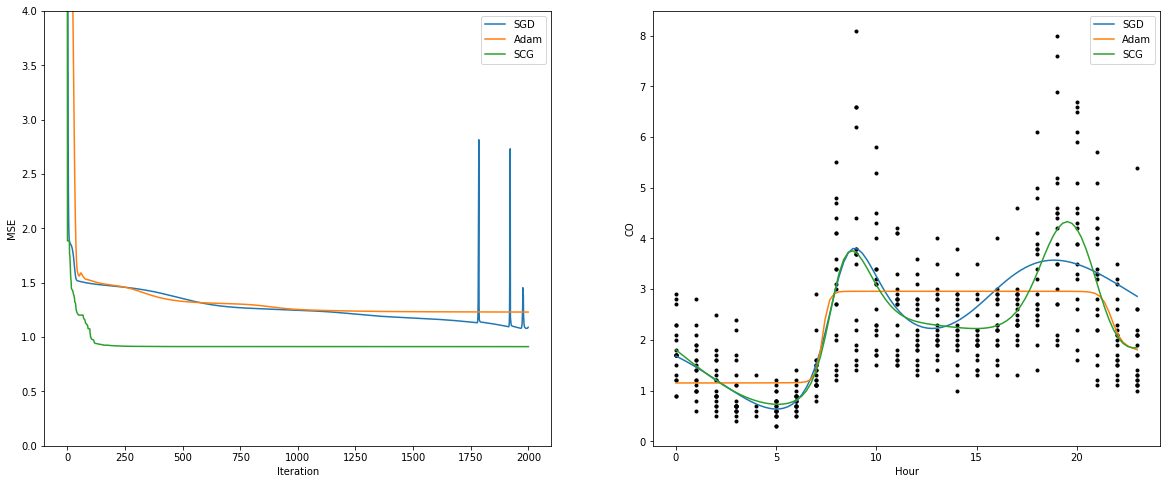

In [30]:
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(result_sgd['ftrace'], label='SGD')
plt.plot(result_adam['ftrace'], label='Adam')
plt.plot(result_scg['ftrace'], label='SCG')
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.ylim(0, 4)

plt.subplot(1, 2, 2)
if standardize:
    plt.plot(X * X_std + X_mean, T, 'k.')  # unstandardize X
else:
    plt.plot(X, T, 'k.')
xs = np.linspace(0, 23, 100).reshape((-1, 1))
xs_standardized = (xs - X_mean) / X_std if standardize else xs
plt.plot(xs, network(result_sgd['w'], n_inputs, n_hiddens_1, n_hiddens_2, n_outputs, xs_standardized), label='SGD')
plt.plot(xs, network(result_adam['w'], n_inputs, n_hiddens_1, n_hiddens_2, n_outputs, xs_standardized), label='Adam')
plt.plot(xs, network(result_scg['w'], n_inputs, n_hiddens_1, n_hiddens_2, n_outputs, xs_standardized), label='SCG')
plt.legend()
plt.xlabel('Hour')
plt.ylabel('CO');

Here is some code that tries a number of values for the key parameters of `n_iterations`, `n_hiddens_1`, `n_hiddens_2` and `learning_rate`.

**Required:** Modify the lists of values in the four for loops to try other parameter values.  Try to find ranges that work well for all three algorithms.

In [38]:
results = []
for n_iterations in [10, 100]:
    for nh1 in [1, 2]:
        for nh2 in [1, 2]:
            
            n_U = (n_inputs + 1) * nh1
            n_V = (nh1 + 1) * nh2
            n_W = (nh2 + 1) * n_outputs
            initial_w = np.random.uniform(-0.1, 0.1, n_U + n_V + n_W)

            result_scg = opt.scg(initial_w, mse, error_gradient, fargs=[n_inputs, nh1, nh2, n_outputs, X, T],
                                 n_iterations=n_iterations)
            results.append([n_iterations, nh1, nh2, 0, 'scg', result_scg['ftrace'][-1]])
            
            for lr in [1e-3, 1e-5]:
                
                result_sgd = opt.sgd(initial_w, mse, error_gradient, fargs=[n_inputs, nh1, nh2, n_outputs, X, T],
                     n_iterations=n_iterations, learning_rate=lr, momentum_rate=0)
                result_adam = opt.adam(initial_w, mse, error_gradient, fargs=[n_inputs, nh1, nh2, n_outputs, X, T],
                                       n_iterations=n_iterations, learning_rate=lr)
                results.append([n_iterations, nh1, nh2, 'sgd', result_scg['ftrace'][-1]])

                results.append([n_iterations, nh1, nh2, lr, 'sgd', result_sgd['ftrace'][-1]])
                results.append([n_iterations, nh1, nh2, lr, 'adam', result_adam['ftrace'][-1]])

results = pandas.DataFrame(results, columns=('Iterations', 'nh1', 'nh2', 'lr', 'algo', 'mse'))
results

,Iterations,nh1,nh2,lr,algo,mse
0,10,1,1,0,scg,1.552321
1,10,1,1,sgd,1.55232,NaN
2,10,1,1,0.1,sgd,2.034285
3,10,1,1,0.1,adam,3.833511
4,10,1,1,sgd,1.55232,NaN
...,...,...,...,...,...,...
75,100,2,2,0.001,sgd,5.504246
76,100,2,2,0.001,adam,6.567040
77,100,2,2,sgd,1.23364,NaN
78,100,2,2,1e-05,sgd,7.260397


**Required:** Show the results for the 20 lowest MSE values, sorted by increasing MSE. Read about the `sort_values` and `head` methods on a `DataFrame`.  You can do this with a single line of python code.

In [41]:
# ...code here....  Can be just one line of python

,Iterations,nh1,nh2,lr,algo,mse
70,100,2,2,0,scg,1.233638
50,100,1,2,0,scg,1.253672
40,100,1,1,0,scg,1.303647
60,100,2,1,0,scg,1.303650
63,100,2,1,0.1,adam,1.312252
43,100,1,1,0.1,adam,1.340349
73,100,2,2,0.1,adam,1.363662
53,100,1,2,0.1,adam,1.367948
72,100,2,2,0.1,sgd,1.504852
10,10,1,2,0,scg,1.505295


## Grading

A2grader.zip IS NOT AVAILABLE YET.

Your notebook will be run and graded automatically. Test this grading process by first downloading [A2grader.zip](http://www.cs.colostate.edu/~anderson/cs545/notebooks/A2grader.zip) and extract `A2grader.py` from it. Run the code in the following cell to demonstrate an example grading session. You should see a perfect execution score of 80/80 if your functions are defined correctly. The remaining 20 points will be based on other testing and the results you obtain and your discussions. 

A different, but similar, grading script will be used to grade your checked-in notebook. It will include additional tests. You should design and perform additional tests on all of your functions to be sure they run correctly before checking in your notebook.  

For the grading script to run correctly, you must first name this notebook as 'Lastname-A1.ipynb' with 'Lastname' being your last name, and then save this notebook.

In [ ]:
%run -i A2grader.py

## Check-In

Do not include this section in your notebook.

Name your notebook ```Lastname-A2.ipynb```.  Submit the file using the ```Assignment 2``` link on [Canvas](https://colostate.instructure.com/courses/86986).